<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal_JAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import warnings;
warnings.simplefilter('ignore')

In [9]:
import prophet
from prophet import Prophet

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [11]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [12]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [14]:
df = pd.read_csv('REC4.csv',parse_dates=True,index_col=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [16]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [17]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [18]:
df.index.year.unique()

Int64Index([2022, 2023], dtype='int64', name='FECHA')

In [19]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [20]:
df_int = df[df.NOMBRE=='Internac'][['NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_int ['traff_x1000']= df_int.TRAFICO/1000 # transform 
df_int ['qty_x1000']= df_int.CANT/1000 # transform 
df_int['part_of_the_week']=df_int.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')
df_int['part_of_the_week_2']=df_int.index.weekday.map(lambda x: 'Promo_day' if x == 0 or x > 3 else 'Normal_day')
df_int['day_name']=df_int.index.day_name()
df_int['month_name'] = df_int.index.month_name()
df_int['year'] = df_int.index.year
df_int['month'] = df_int.index.month
df_int['day']=df_int.index.day
df_int['ds']= df_int['year'].apply('{:0>2d}'.format) +'-' + df_int['month'].apply('{:0>2d}'.format)+'-'+df_int['day'].apply('{:0>2d}'.format) # To create a format mm-dd

In [21]:
df_int.index.duplicated().sum()

0

In [22]:
df_int

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds
FECHA,,,,,,,,,,,,,,,
2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022,11,1,2022-11-01
2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022,11,2,2022-11-02
2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022,11,3,2022-11-03
2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022,11,4,2022-11-04
2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022,11,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,Weekday,Promo_day,Monday,May,2023,5,8,2023-05-08
2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,Weekday,Normal_day,Tuesday,May,2023,5,9,2023-05-09
2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,Weekday,Normal_day,Wednesday,May,2023,5,10,2023-05-10


In [23]:
#pred = df_int[(df_int.day_name=='Monday')][['qty_x1000','ds']]
pred = df_int[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [24]:
pred = pred.reset_index(drop=True)

In [25]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


In [26]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyntxk0re/1fy1wnjp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyntxk0re/2ns56aln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42410', 'data', 'file=/tmp/tmpyntxk0re/1fy1wnjp.json', 'init=/tmp/tmpyntxk0re/2ns56aln.json', 'output', 'file=/tmp/tmpyntxk0re/prophet_modelxbxg4hmt/prophet_model-20230527214756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1218.886986,830.360059,1410.313104,1218.886986,1218.886986,-104.673054,-104.673054,-104.673054,252.195364,252.195364,252.195364,-356.868418,-356.868418,-356.868418,0.0,0.0,0.0,1114.213932
1,2022-11-02,1218.865364,730.631657,1365.694104,1218.865364,1218.865364,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1055.895461
2,2022-11-03,1218.843742,731.971501,1328.286552,1218.843742,1218.843742,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1037.224343
3,2022-11-04,1218.822121,1426.459685,2049.972664,1218.822121,1218.822121,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1735.606357
4,2022-11-05,1218.800499,1490.555300,2092.513675,1218.800499,1218.800499,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1784.320354


In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
288,2023-08-16,1249.623684,777.269713,1414.098099,1246.139945,1253.266826,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1086.653781
289,2023-08-17,1249.756184,771.852276,1394.190599,1246.222190,1253.428765,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1068.136784
290,2023-08-18,1249.888684,1448.134154,2077.621755,1246.297989,1253.590704,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1766.672921
291,2023-08-19,1250.021184,1522.176183,2129.714330,1246.367801,1253.752643,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1815.541039
292,2023-08-20,1250.153684,1579.340832,2243.984869,1246.447297,1253.914584,671.725309,671.725309,671.725309,252.195364,252.195364,252.195364,419.529945,419.529945,419.529945,0.0,0.0,0.0,1921.878993


In [29]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2022-11-01,1114.213932
1,2022-11-02,1055.895461
2,2022-11-03,1037.224343
3,2022-11-04,1735.606357
4,2022-11-05,1784.320354
...,...,...
288,2023-08-16,1086.653781
289,2023-08-17,1068.136784
290,2023-08-18,1766.672921
291,2023-08-19,1815.541039


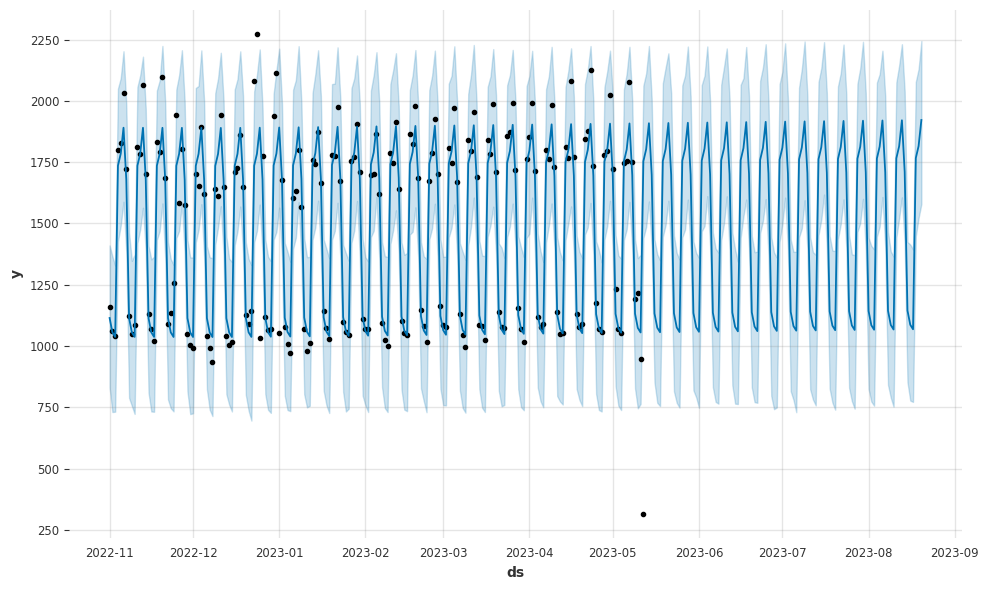

In [30]:
plot1 = m.plot(forecast)

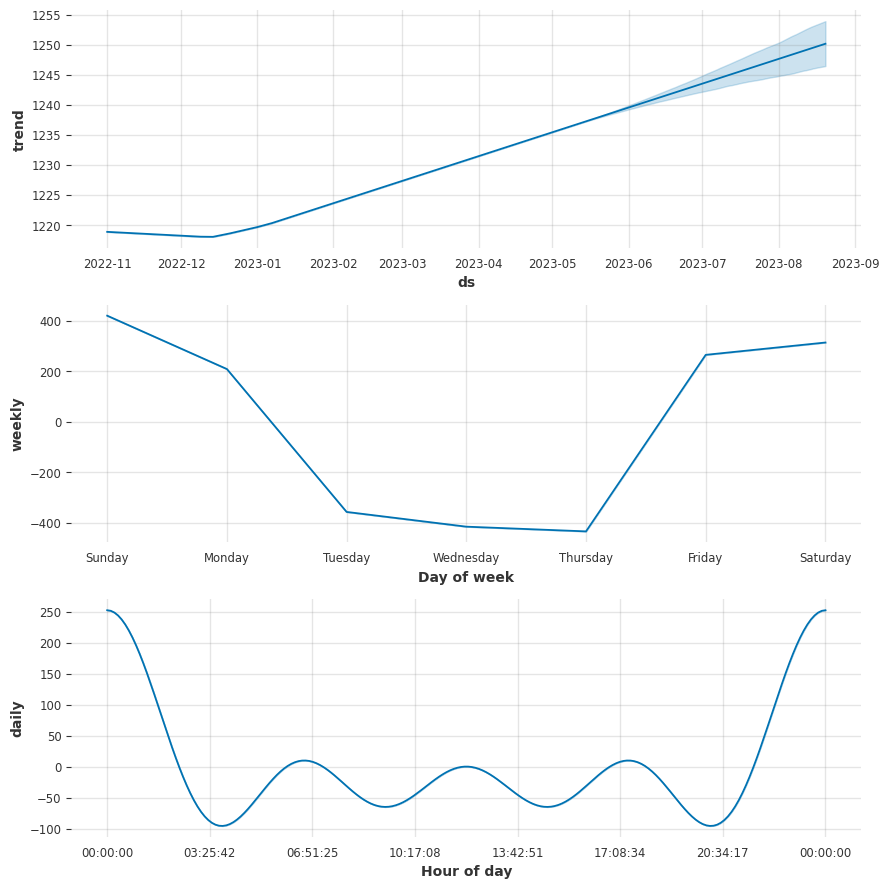

In [31]:
plot2=m.plot_components(forecast)

In [37]:
import pandas as pd
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression

In [38]:
y = TimeSeries.from_series(pred['y'])

In [39]:
y_train = y[:-24]

In [44]:
y_train

<TimeSeries (DataArray) (time: 169, component: 1, sample: 1)>
array([[[1157.375]],

       [[1062.818]],

       [[1040.217]],

       [[1800.05 ]],

       [[1830.014]],

       [[2033.155]],

       [[1723.002]],

       [[1122.071]],

       [[1050.5  ]],

       [[1084.024]],

...

       [[1982.479]],

       [[1730.555]],

       [[1136.829]],

       [[1050.175]],

       [[1052.888]],

       [[1809.846]],

       [[1766.427]],

       [[2079.448]],

       [[1770.253]],

       [[1129.787]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 161 162 163 164 165 166 167 168
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [40]:
model = RegressionModel(
                        lags=[-1,-2,-12],
                        model=LinearRegression()
                       )

In [41]:
model.fit(series=y_train)

RegressionModel(lags=[-1, -2, -12], lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, add_encoders=None, model=LinearRegression(), multi_models=True, use_static_covariates=True)

In [42]:
y_pred = model.predict(n=24, series=y_train)

In [45]:
y_pred

<TimeSeries (DataArray) (time: 24, component: 1, sample: 1)>
array([[[1148.94364175]],

       [[1425.49219406]],

       [[1556.64755558]],

       [[1527.58757841]],

       [[1489.28376663]],

       [[1484.98653466]],

       [[1498.29067886]],

       [[1467.00193001]],

       [[1446.7616974 ]],

       [[1431.94898249]],

...

       [[1464.01818431]],

       [[1460.31813174]],

       [[1472.00781755]],

       [[1480.13878148]],

       [[1479.04580587]],

       [[1476.7637223 ]],

       [[1477.04756798]],

       [[1478.9322748 ]],

       [[1478.95204669]],

       [[1475.55733921]]])
Coordinates:
  * time       (time) int64 169 170 171 172 173 174 ... 187 188 189 190 191 192
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [46]:
y_pred

<TimeSeries (DataArray) (time: 24, component: 1, sample: 1)>
array([[[1148.94364175]],

       [[1425.49219406]],

       [[1556.64755558]],

       [[1527.58757841]],

       [[1489.28376663]],

       [[1484.98653466]],

       [[1498.29067886]],

       [[1467.00193001]],

       [[1446.7616974 ]],

       [[1431.94898249]],

...

       [[1464.01818431]],

       [[1460.31813174]],

       [[1472.00781755]],

       [[1480.13878148]],

       [[1479.04580587]],

       [[1476.7637223 ]],

       [[1477.04756798]],

       [[1478.9322748 ]],

       [[1478.95204669]],

       [[1475.55733921]]])
Coordinates:
  * time       (time) int64 169 170 171 172 173 174 ... 187 188 189 190 191 192
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

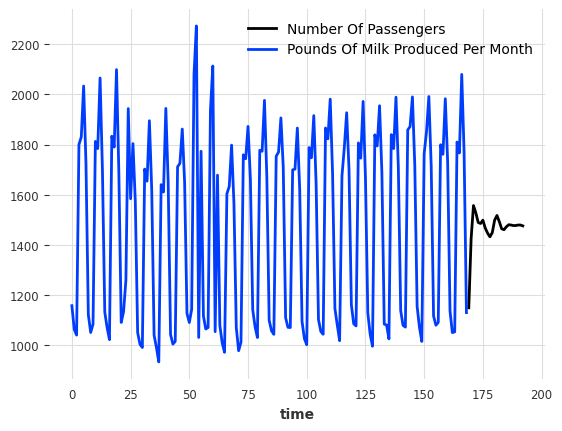

In [47]:
y_pred.plot(label="Number Of Passengers")
y_train.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend();

In [25]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

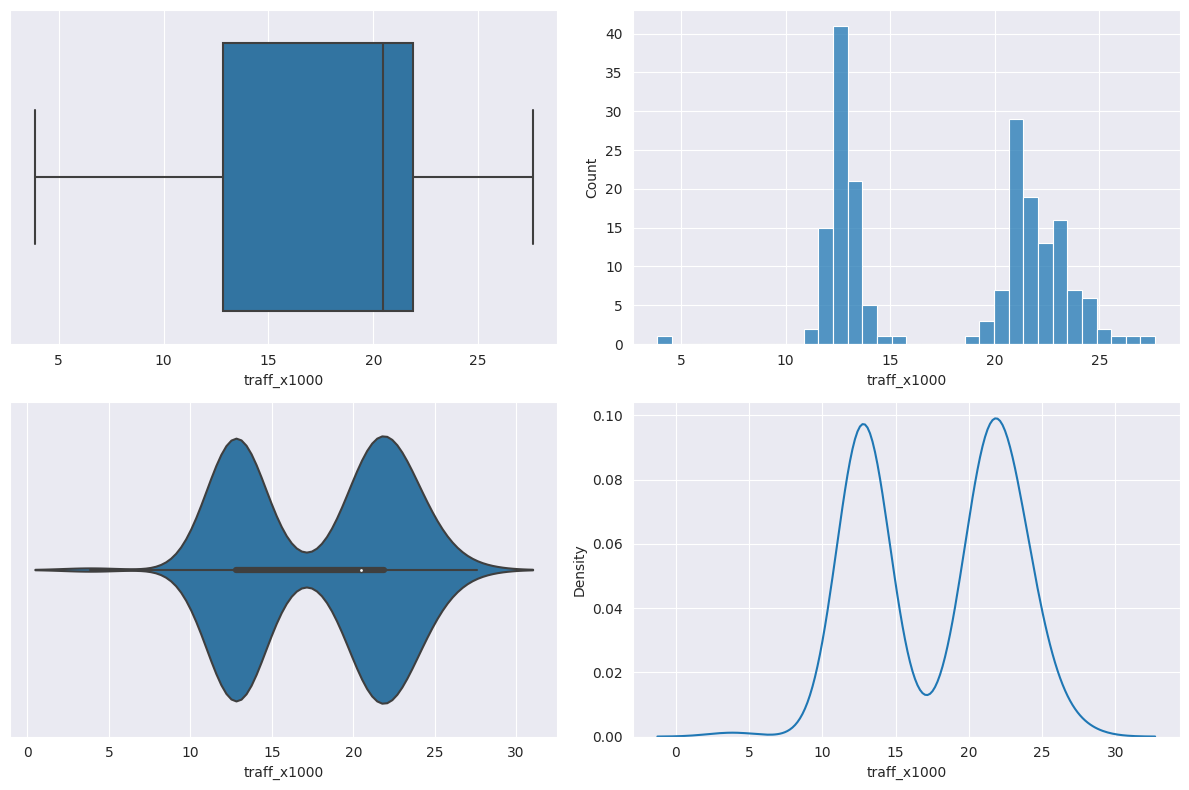

In [26]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=df_int, x='traff_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=df_int,x='traff_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=df_int,x='traff_x1000', ax=axs[1,0])
sns.kdeplot(data=df_int, x='traff_x1000', ax=axs[1,1])
plt.tight_layout()

ValueError: ignored

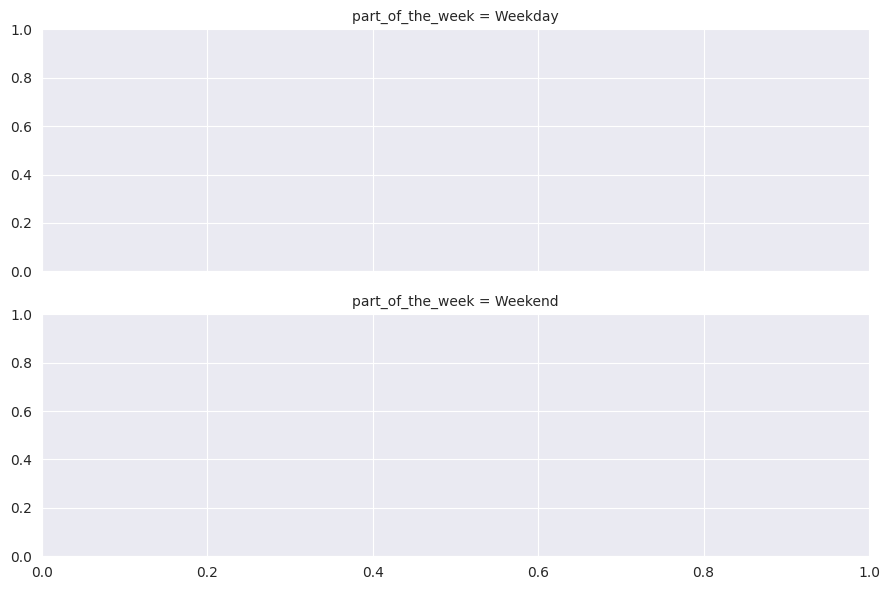

In [27]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [ ]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week_2',  hue='part_of_the_week_2',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [ ]:
df_int['two_week_lag_traff'] = df_int['traff'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
df_int ['two_week_lag_traff_x1000']= df_int['two_week_lag_traff']/1000

In [ ]:
df_int.head(16)

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='two_week_lag_traff_x1000', y='traff_x1000', hue='part_of_the_week')

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='qty_x1000', y='traff_x1000', hue='part_of_the_week')

In [ ]:
df_int.describe()